<a href="https://colab.research.google.com/github/schreiterjp/colab_save/blob/main/csv_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd

In [ ]:
#read csv file
#df = pd.read_csv()

#dummy dataframe for first testing 
data = {'name':['müller', 'mustermann', 'wick', 'skywalker', 'potter'],
        'company':['abc', 'rental', 'science', 'light', 'mystery'],
        'department':['a', 'b', None , 'd', 'e'],
        'country':['germany', 'poland', 'nz', 'au', 'gb'], 
        'value_a':[1,2,3,4,5],
        'value_b':[6,7,8,9,10]
        }

df = pd.DataFrame(data)
df

,name,company,department,country,value_a,value_b
0,müller,abc,a,germany,1,6
1,mustermann,rental,b,poland,2,7
2,wick,science,None,nz,3,8
3,skywalker,light,d,au,4,9
4,potter,mystery,e,gb,5,10


general information

In [ ]:
df.head()

,name,company,department,country,value_a,value_b
0,müller,abc,a,germany,1,6
1,mustermann,rental,b,poland,2,7
2,wick,science,None,nz,3,8
3,skywalker,light,d,au,4,9
4,potter,mystery,e,gb,5,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        5 non-null      object
 1   company     5 non-null      object
 2   department  4 non-null      object
 3   country     5 non-null      object
 4   value_a     5 non-null      int64 
 5   value_b     5 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 368.0+ bytes


In [ ]:
df.describe()

,value_a,value_b
count,5.000000,5.000000
mean,3.000000,8.000000
std,1.581139,1.581139
min,1.000000,6.000000
25%,2.000000,7.000000
50%,3.000000,8.000000
75%,4.000000,9.000000
max,5.000000,10.000000


delete columns

In [ ]:
#df = df.drop(columns='')

**handling missing data if nessescary**

view missing values

In [ ]:
df.isnull().sum(axis=0)

name          0
company       0
department    0
country       0
value_a       0
value_b       0
dtype: int64

In [ ]:
df.isna().sum(axis=0)

name          0
company       0
department    0
country       0
value_a       0
value_b       0
dtype: int64

insert mean value of columns 

In [ ]:
#replace column_name
df[column_name]=df[column_name].fillna(df.colum_name.mean())

NameError: ignored

drop columns with missing data

In [ ]:
df = df.dropna()

**Cleaning data**


delete duplicates

In [ ]:
df = df.drop_duplicates()

tidy data

In [ ]:
tidy_df = pd.melt(frame=df, id_vars="name", value_vars=['value_a', 'value_b'])
tidy_df

,name,variable,value
0,müller,value_a,1
1,mustermann,value_a,2
2,wick,value_a,3
3,skywalker,value_a,4
4,potter,value_a,5
5,müller,value_b,6
6,mustermann,value_b,7
7,wick,value_b,8
8,skywalker,value_b,9
9,potter,value_b,10


**Save DF to CSV**

In [ ]:
df.to_csv("/content/sample_data/test2.csv",index=False)

**Outlier**


**Build Dataset**

In [ ]:
!git clone https://gist.github.com/2dfd2de0d4f8727f873422c5d959fff5.git

Cloning into '2dfd2de0d4f8727f873422c5d959fff5'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


In [ ]:
titanic_df = pd.read_csv("/content/2dfd2de0d4f8727f873422c5d959fff5/titanic.csv")
print(titanic_df.isnull().sum(axis=0))
#print(titanic_df.isna().sum(axis=0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
titanic_df = titanic_df.drop(columns="Cabin")

In [ ]:
titanic_df["Age"]=titanic_df["Age"].fillna(titanic_df.Age.mean())

In [ ]:
print(titanic_df.isnull().sum(axis=0))
print(titanic_df.isna().sum(axis=0))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [ ]:
len(titanic_df)

891

In [ ]:
titanic_df.dropna(inplace=True)

In [ ]:
len(titanic_df)

889

In [ ]:
titanic_df.to_csv("/content/sample_data/titanic.csv", index=False)

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score , confusion_matrix , r2_score , classification_report

class OneHotEncoder():
    def __init__(self,series):
        unique_values = series.unique()
        self.ordinals = {
            val: i for i,val in enumerate(unique_values)
        }
        self.encoder = torch.eye(len(unique_values) , len(unique_values))
        
    def __getitem__(self,value):
        return self.encoder[self.ordinals[value]]

class DateEncoder():
    def __getitem__(self, datestring):
        parsed = dateutil.parser.parse(datestring)
        return torch.Tensor([parsed.year, parsed.month , parsed.day])

class MixedCSV(Dataset):
    def __init__(self , datafile , output_series_name , date_series_name , categorical_series_name , ignore_series_name):
        self.dataset = pd.read_csv(datafile)
        self.output_series_name = output_series_name
        self.encoders = {}
        for series_name in date_series_name:
            self.encoders[series_name] = DateEncoder()
        for series_name in categorical_series_name:
            self.encoders[series_name] = OneHotEncoder(self.dataset[series_name])
        self.ignore = ignore_series_name
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self , index):
        if type(index) is torch.Tensor:
            index = index.item()
        sample = self.dataset.iloc[index]
        output = torch.Tensor([sample[self.output_series_name]])
        input_components = []
        for name , value in sample.items():
            if name in self.ignore:
                continue
            elif name in self.encoders:
                input_components.append(self.encoders[name][value])
            else:
                input_components.append(torch.Tensor([value]))
        
        input = torch.cat(input_components)
        return input , output


#date_type = []
#categorical_data =  ['name' , 'variable']
#discard = []
#output_column = 'value'
#houses = MixedCSV('/content/sample_data/test.csv' , 
#                    output_column,
#                    date_type , 
#                    categorical_data , 
#                    discard)

date_type = []
categorical_data =  ["Name","Sex","Ticket","Embarked"]
discard = ["Cabin", "PassengerId"]
output_column = 'Survived'
houses = MixedCSV('/content/sample_data/titanic.csv' , 
                    output_column,
                    date_type , 
                    categorical_data , 
                    discard)

In [ ]:
print(houses[3])

train , test = torch.utils.data.random_split(houses , [len(houses)-int(len(houses)*0.2), int(len(houses)*0.2)])

print(len(test))

print(houses[0][0].shape[0])

(tensor([1., 1., 0.,  ..., 1., 0., 0.]), tensor([1.]))
177
1580


In [ ]:
class Model(torch.nn.Module):
    def __init__(self , input_dimesions , size = 128):
        super().__init__()
        self.layer_one = torch.nn.Linear(input_dimesions , size)
        self.activation_one = torch.nn.ReLU6()
        self.layer_two = torch.nn.Linear(size , size)
        self.activation_two = torch.nn.ReLU6()
        self.shape_outputs = torch.nn.Linear(size , 1)
    
    def forward(self , inputs):
        buffer = self.layer_one(inputs)
        buffer = self.activation_one(buffer)
        buffer = self.layer_two(buffer)
        buffer = self.activation_two(buffer)
        buffer = self.shape_outputs(buffer)
        return buffer
    
model = Model(houses[0][0].shape[0])
optimizer = torch.optim.Adam(model.parameters())
loss_function = torch.nn.MSELoss()

number_for_testing = int(len(houses)*0.2)
number_for_training = len(houses) - number_for_testing
train , test = torch.utils.data.random_split(houses , [number_for_training , number_for_testing])
training = torch.utils.data.DataLoader(train , batch_size = 32 , shuffle = True)

model.train()
for epoch in range(100):
    for inputs , outputs in training:
        optimizer.zero_grad()
        results = model(inputs)
        loss = loss_function(results , outputs)
        loss.backward()
        optimizer.step()
    print('Loss {0}'.format(loss))
    
print('Printing R-Square Score ....\n')

model.eval()
with torch.no_grad():
  testing = torch.utils.data.DataLoader(test , batch_size = len(test) , shuffle= False)
  for inputs , outputs in testing:
      predicted = model(inputs).detach().numpy()
      actual = outputs.numpy()
      print(r2_score(predicted , actual))

Loss 0.229771226644516
Loss 0.21534696221351624
Loss 0.2040802538394928
Loss 0.04354430362582207
Loss 0.01789444498717785
Loss 0.022830920293927193
Loss 0.013615511357784271
Loss 0.0041952249594032764
Loss 0.03439207747578621
Loss 0.025296075269579887
Loss 0.0034242686815559864
Loss 0.0007789207738824189
Loss 0.0009436760446988046
Loss 0.00200777780264616
Loss 0.000499892164953053
Loss 0.00029257035930640996
Loss 0.0007294884417206049
Loss 2.9027463824604638e-05
Loss 0.0023620391730219126
Loss 0.001269246218726039
Loss 0.00015136486035771668
Loss 0.00019675047951750457
Loss 0.00011926556908292696
Loss 0.0006136188749223948
Loss 0.0002715928421821445
Loss 1.9647970475489274e-05
Loss 0.0012171845883131027
Loss 0.0016337435226887465
Loss 0.0005006426945328712
Loss 6.797159585403278e-05
Loss 8.776771574048325e-05
Loss 0.0005572151858359575
Loss 7.655831723241135e-05
Loss 0.0003328842285554856
Loss 0.00022957856708671898
Loss 0.0002732754801400006
Loss 0.0004860497429035604
Loss 9.126200893

In [ ]:
data_to_be_predicted = houses[2][0]

model.eval() #set model in evaluation mode - fix parameter values
prediction = model(data_to_be_predicted).detach().numpy() #get model output, detach, convert to numpy and round value to get exact prediction
print(prediction, abs(prediction.round()))

[0.9802835] [1.]


In [ ]:
df = pd.read_csv('/content/sample_data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


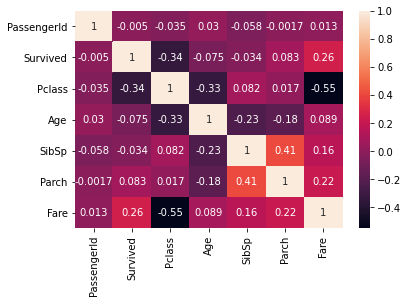

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()